<a href="https://colab.research.google.com/github/bsmrvl/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [ ]:
# YOUR WORK HERE

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv')

###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [ ]:
# YOUR WORK HERE

print(df.shape)
df.head()

(485, 4)


,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [17]:
# YOUR WORK HERE

genders = pd.crosstab(df['Gender'],'counts')
genders

col_0,counts
Gender,
0,263
1,222


In [18]:
genders['rel_freq'] = genders['counts'] / df['Gender'].count() * 100
genders

col_0,counts,rel_freq
Gender,,
0,263,54.226804
1,222,45.773196


There are slightly more female characters in Slasher films than male, but not to any large extent.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [15]:
# YOUR WORK HERE

survival = pd.crosstab(df['Survival'],'counts')
survival

col_0,counts
Survival,
0,400
1,85


In [16]:
survival['rel_freq'] = survival['counts'] / df['Survival'].count() * 100
survival

col_0,counts,rel_freq
Survival,,
0,400,82.474227
1,85,17.525773


There are significantly more character deaths in Slasher films than character survivals--no surprise.

###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [19]:
# YOUR WORK HERE

ct = pd.crosstab(index=df['Gender'], columns=df['Survival'], margins=True)
ct

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


Looking at these counts, it appears that male characters proportionally survive a bit more than females. However, the difference is not drastic.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [20]:
# YOUR WORK HERE

ct_cond = pd.crosstab(index=df['Gender'], columns=df['Survival'], margins=True, normalize='index')*100
ct_cond

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523
All,82.474227,17.525773


23% of males survive versus 13% of females. It is hard to say whether this is significant or not without first running a chi-square test.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is **no** relationship between character sex and survival in a slasher film.

**Ha:** There **is** a relationship between character sex and survival in a slasher film.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [66]:
# YOUR WORK HERE

from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(index=df['Gender'], columns=df['Survival']))
print('p-value: ' + str(p))

p-value: 0.011104692591139975


### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

Our p-value is 0.0111, which is below the 0.05 (95%) significance level. This allows us to **reject the null hypothesis** that there is no relationship between sex and survival in slasher films.

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

In [26]:
import numpy as np

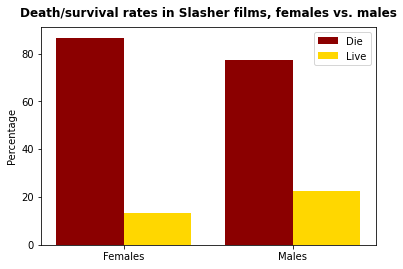

In [63]:
# YOUR WORK HERE

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

die = [86.7, 77.5]
live = [13.3, 22.5]

ind = np.array([1,2])
w = .4

rects1 = plt.bar(ind, height=die, width=w, color='darkred')
rects2 = plt.bar(ind+w, height=live, width=w, color='gold')

ax.set_xticks(ind + w/2)
ax.set_xticklabels(['Females','Males'])
ax.set_ylabel('Percentage')

ax.legend(handles=[rects1, rects2], labels=['Die','Live'])

ax.set_title('Death/survival rates in Slasher films, females vs. males', fontweight='bold', y=1.02)

plt.show()

As suggested by this plot and confirmed by our chi-square test, it is **not** reasonable to assume there is no relation between character sex and their survival in a slasher film. There does indeed seem to be a relation, and the plot suggests that it is **female** characters which die more often.

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.